<a href="https://colab.research.google.com/github/imaranjan/Data-Analysis-and-Visualization-of-Netflix-Content-Trends/blob/main/Netflix_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netfilx Dataset** : Data Cleaning and Analysis using Python libraries

**Problem Statement:**

We need to have a look over data driven insights on which TV shows or movies to produce to increase the viewership or the engagement of public on the Netflix platformn and help Netflix to grow their business.

---



---



In [ ]:
## Importing the Python Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the Netflix dataset

df = pd.read_csv('Netflix_data.csv')

In [ ]:
df # Exploring the data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# Shape of the data (rows, columns)
df.shape

(8807, 12)

In [ ]:
# Brief information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
## We don't need the description column in our analysis --> Removed

df.drop('description', axis = 1, inplace = True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


# **Major challenges with the given dataset for analysis:**

1. Comma separated values (Nested values) in some of the columns i.e. director, cast, etc.
2. Missing valus in some of the cells.
3. Date format

# Handling the Nested Values:
Using split and explode commands for the columns : director, cast, country, listed_in

In [ ]:
# Separating the values in different rows in director column

df = df.assign(director = df['director'].str.split(', '))
df = df.explode('director')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
# Separating the values in different rows in cast column

df = df.assign(cast = df['cast'].str.split(', '))
df = df.explode('cast')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [ ]:
# Separating the values in different rows in country column

df = df.assign(country = df['country'].str.split(', '))
df = df.explode('country')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [ ]:
# Separating the values in different rows in listed_in column

df = df.assign(listed_in = df['listed_in'].str.split(', '))
df = df.explode('listed_in')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows




---

---





# Handling the Missing Values:
Filled the missing values with appropriate/approx data:


1.   director --> mode of director with respect to genre and country
2.   cast --> mode of cast with respect to country
3.   country --> Mode of country
4.   Date_added --> 'Unknown'
5.   Rating --> Mode of rating
6.   Duration --> Deleted the rows as it was very less in number



In [ ]:
## Calculating the null values in each column

df.isna().sum()

,0
show_id,0
type,0
title,0
director,50643
cast,2146
country,11897
date_added,158
release_year,0
rating,67
duration,3


**Calculating the Modes and filling the missing data:**


In [ ]:
## Director Column

df_director = df.groupby(['listed_in','country'])['director'].apply(lambda x: x.mode()).reset_index(name = 'director_mode')
df = df.merge(df_director, on = ['listed_in','country'], how = 'inner')
df['director'] = df['director'].fillna(df['director_mode'])

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,level_2,director_mode
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,0,Peter Spirer
1,s5,TV Show,Kota Factory,B. V. Nandini Reddy,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,0,B. V. Nandini Reddy
2,s5,TV Show,Kota Factory,Nag Ashwin,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,1,Nag Ashwin
3,s5,TV Show,Kota Factory,Sankalp Reddy,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,2,Sankalp Reddy
4,s5,TV Show,Kota Factory,Tharun Bhascker Dhaassyam,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,3,Tharun Bhascker Dhaassyam
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227087,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,0,Anurag Kashyap
227088,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,0,Sooraj R. Barjatya
227089,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,0,Anurag Kashyap
227090,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,0,Anurag Kashyap


In [ ]:
df.drop(['level_2','director_mode'], axis=1, inplace=True) ## Deleting the extra columns

In [ ]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s5,TV Show,Kota Factory,B. V. Nandini Reddy,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
2,s5,TV Show,Kota Factory,Nag Ashwin,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
3,s5,TV Show,Kota Factory,Sankalp Reddy,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
4,s5,TV Show,Kota Factory,Tharun Bhascker Dhaassyam,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
5,s5,TV Show,Kota Factory,Dheeraj Berry,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,TV Comedies
6,s5,TV Show,Kota Factory,B. V. Nandini Reddy,Jitendra Kumar,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
7,s5,TV Show,Kota Factory,Nag Ashwin,Jitendra Kumar,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
8,s5,TV Show,Kota Factory,Sankalp Reddy,Jitendra Kumar,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
9,s5,TV Show,Kota Factory,Tharun Bhascker Dhaassyam,Jitendra Kumar,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows


In [ ]:
## Cast Column

df_cast = df.groupby('country')['cast'].apply(lambda x: x.mode()).reset_index(name = 'cast_mode')
df = df.merge(df_cast, on = 'country', how = 'inner')
df['cast'] = df['cast'].fillna(df['cast_mode'])

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,level_1,cast_mode
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,James Franco,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,0,James Franco
1,s5,TV Show,Kota Factory,B. V. Nandini Reddy,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,0,Prakash Raj
2,s5,TV Show,Kota Factory,Nag Ashwin,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,0,Prakash Raj
3,s5,TV Show,Kota Factory,Sankalp Reddy,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,0,Prakash Raj
4,s5,TV Show,Kota Factory,Tharun Bhascker Dhaassyam,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,0,Prakash Raj
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350516,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,0,Prakash Raj
350517,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,0,Prakash Raj
350518,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,0,Prakash Raj
350519,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,0,Prakash Raj


In [ ]:
df.drop(['level_1','cast_mode'], axis=1, inplace=True) ## Deleting the extra columns

In [ ]:
# Country Column

country_mode = df['country'].mode()[0]
df['country'] = df['country'].fillna(country_mode)

In [ ]:
# Date_added Column

df['date_added'] = df['date_added'].fillna('Unknown')

In [ ]:
# Rating column

rating_mode = df['rating'].mode()[0]
df['rating'] = df['rating'].fillna(rating_mode)

In [ ]:
# Duration column

df = df.dropna(subset=['duration']) # droping the rows with null value in duration column

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,James Franco,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s5,TV Show,Kota Factory,B. V. Nandini Reddy,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
2,s5,TV Show,Kota Factory,Nag Ashwin,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
3,s5,TV Show,Kota Factory,Sankalp Reddy,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
4,s5,TV Show,Kota Factory,Tharun Bhascker Dhaassyam,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...
350516,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies
350517,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals
350518,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas
350519,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies


In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
## Checking for duplicate rows

duplicate = df[df.duplicated()]
duplicate

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
46,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,"September 24, 2021",1993,TV-MA,125 min,Independent Movies
49,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Burkina Faso,"September 24, 2021",1993,TV-MA,125 min,Dramas
50,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Burkina Faso,"September 24, 2021",1993,TV-MA,125 min,Dramas
51,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Burkina Faso,"September 24, 2021",1993,TV-MA,125 min,Dramas
52,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Burkina Faso,"September 24, 2021",1993,TV-MA,125 min,Dramas
...,...,...,...,...,...,...,...,...,...,...,...
350308,s8798,TV Show,Zak Storm,Thomas Astruc,Christine Marie Cabanos,France,"September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV
350312,s8798,TV Show,Zak Storm,Thomas Astruc,Christopher Smith,France,"September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV
350316,s8798,TV Show,Zak Storm,Thomas Astruc,Max Mittelman,France,"September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV
350320,s8798,TV Show,Zak Storm,Thomas Astruc,Reba Buhr,France,"September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV


In [ ]:
## Removing the duplicate rows
df = df.drop_duplicates(keep='last')

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,James Franco,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s5,TV Show,Kota Factory,B. V. Nandini Reddy,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
2,s5,TV Show,Kota Factory,Nag Ashwin,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
3,s5,TV Show,Kota Factory,Sankalp Reddy,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
4,s5,TV Show,Kota Factory,Tharun Bhascker Dhaassyam,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...
350516,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies
350517,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals
350518,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas
350519,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies


**Extracting Year and Month from date_added Column for each row.**

In [ ]:
## Adding year_added and month_added columns in the dataframe

df = df.copy()

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Fill NaT (if any) in 'year_added' and 'month_added' with a default value like 0 or 'Unknown'
df['year_added'] = df['year_added'].fillna(0).astype(int)
df['month_added'] = df['month_added'].fillna(0).astype(int)

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,James Franco,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9
1,s5,TV Show,Kota Factory,B. V. Nandini Reddy,Mayur More,India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021,9
2,s5,TV Show,Kota Factory,Nag Ashwin,Mayur More,India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021,9
3,s5,TV Show,Kota Factory,Sankalp Reddy,Mayur More,India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021,9
4,s5,TV Show,Kota Factory,Tharun Bhascker Dhaassyam,Mayur More,India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350516,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies,2019,3
350517,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,2019,3
350518,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,2019,3
350519,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,International Movies,2019,3




---



---



# Analysis of the Cleaned Data:

# Analysis Based on Actor/Director:

In [ ]:
## Director with most number of movies

dir_popular = df.groupby('director')['title'].nunique().sort_values(ascending = False)
dir_popular.reset_index(name = 'Number of movies')

,director,Number of movies
0,Danny Cannon,327
1,Noam Murro,280
2,Thomas Astruc,270
3,David Schalko,249
4,Kenny Ortega,249
...,...,...
4732,Bryan Buckley,1
4733,Justin Krook,1
4734,Justin Lee,1
4735,Justin McConnell,1


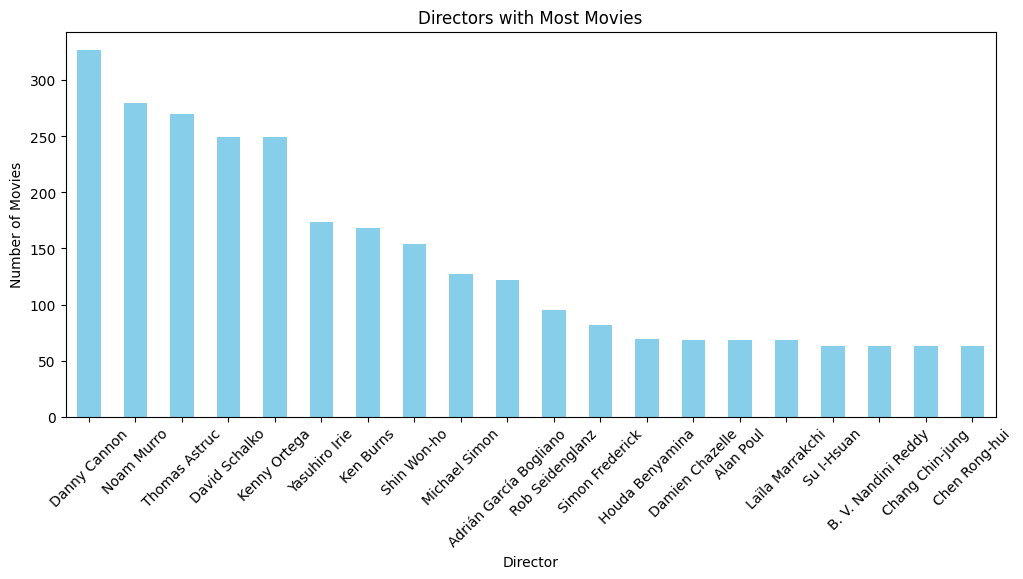

In [ ]:
# Visualization of the above data

dir_popular.head(20).plot(kind='bar', figsize=(12, 5), color='skyblue')
plt.title('Directors with Most Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

**Inference:**

By looking at the above bar graph we can conclude with the most popular Director over the Netflix platform and where Danny Cannon has dove over 300 movies and TV shows.

---



---



In [ ]:
## Most popular actor-director pair (top 10)

pair_counts = df.groupby(['cast', 'director'])['title'].nunique().reset_index(name='Count')
pair_counts = pair_counts.sort_values(by='Count', ascending=False)
pair_counts.head(10)

,cast,director,Count
30915,James Franco,Ken Burns,86
30716,James Franco,Adrián García Bogliano,42
30973,James Franco,Michael Simon,41
34890,John Cleese,Noam Murro,36
30783,James Franco,Danny Cannon,29
34913,John Cleese,Simon Frederick,25
71721,Takahiro Sakurai,Yasuhiro Irie,21
78633,Yuki Kaji,Yasuhiro Irie,19
30818,James Franco,Everardo Gout,18
30996,James Franco,Peter Spirer,17


**Inference:-**

By the above data we can conlude that James Franco and Ken Burns are the most popular and successful actor - director duo over the Netflix platform.

---



---



In [ ]:
# Actor with most movies

actor_most_movies = df.groupby('cast')['title'].nunique().reset_index(name='No of movies')
actor_most_movies.sort_values(by='No of movies', ascending=False)

,cast,No of movies
13030,James Franco,425
14525,John Cleese,119
3691,Benjamin Biolay,49
24854,Prakash Raj,48
26225,Robb Wells,45
...,...,...
5609,Cheran,1
5611,Cherie Chung,1
5612,Chermarn Boonyasak,1
5613,Cherry Jones,1


**Inference:-**

Above analysis shows the actors with most movie/Tv show appearences.

---



---



In [ ]:
# Actor with most movies for each country

actor_by_country = df.groupby(['country', 'cast'])['title'].nunique().reset_index(name='No of movies')
most_movies_actor_by_country = actor_by_country.loc[actor_by_country.groupby('country')['No of movies'].idxmax()]
most_movies_actor_by_country = most_movies_actor_by_country.sort_values(by='No of movies', ascending=False).reset_index(drop=True)

most_movies_actor_by_country

,country,cast,No of movies
0,United States,James Franco,425
1,United Kingdom,John Cleese,112
2,India,Prakash Raj,48
3,Canada,John Paul Tremblay,44
4,Japan,Yuki Kaji,37
...,...,...,...
108,Montenegro,Ana Begic,1
109,Mozambique,Aldovina Chiziane,1
110,Nepal,Aarif Rahman,1
111,Nicaragua,Freeway Rick Ross,1


**Inferences:-**

Here are the results of most successful/popular actor in each of the country where James France leads the way in US with 425 movies, John Cleese in UK with 112 movies and Prakash Raj in India with 48 movies followed by the other countries and their most popular actor.

---



---



# Comparison of Movies vs TV Shows

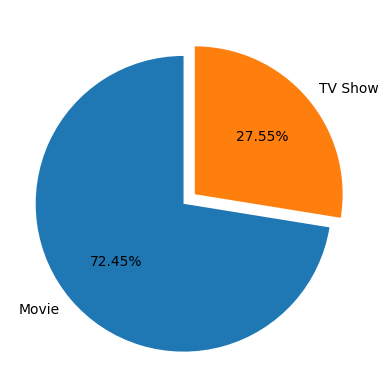

In [ ]:
## Number of movies vs TV shows on Netflix

type_counts = df.groupby('type')['title'].nunique()

plt.pie(type_counts, labels = type_counts.index, startangle=90, explode = (0.1,0, ), autopct='%1.2f%%')
plt.show()

**Inferences:-**

This Pie charts shows the distribution of the content type i.e. Movies and TV shows and their share over the Netflix platform where **72.45%** are movies and **27.55%** is covered with TV shows.

This shows that Netflix is producing both type content in a fair amount.

---



---



In [ ]:
## Count TV Shows and Movies for Each Country

pivot_table = df.pivot_table(index='country', columns='type', values='show_id', aggfunc='count', fill_value=0)
pivot_table.columns = ['Movies', 'TV Shows']

pivot_table['Total'] = pivot_table['Movies'] + pivot_table['TV Shows']
pivot_table = pivot_table.sort_values(by='Total', ascending=False)
pivot_table.reset_index()

,country,Movies,TV Shows,Total
0,United States,45875,15541,61416
1,India,21411,2577,23988
2,United Kingdom,8556,4541,13097
3,France,6659,3648,10307
4,Canada,5801,2773,8574
...,...,...,...,...
108,Vatican City,3,0,3
109,Afghanistan,2,0,2
110,Sri Lanka,2,0,2
111,Panama,2,0,2


<Figure size 1500x800 with 0 Axes>

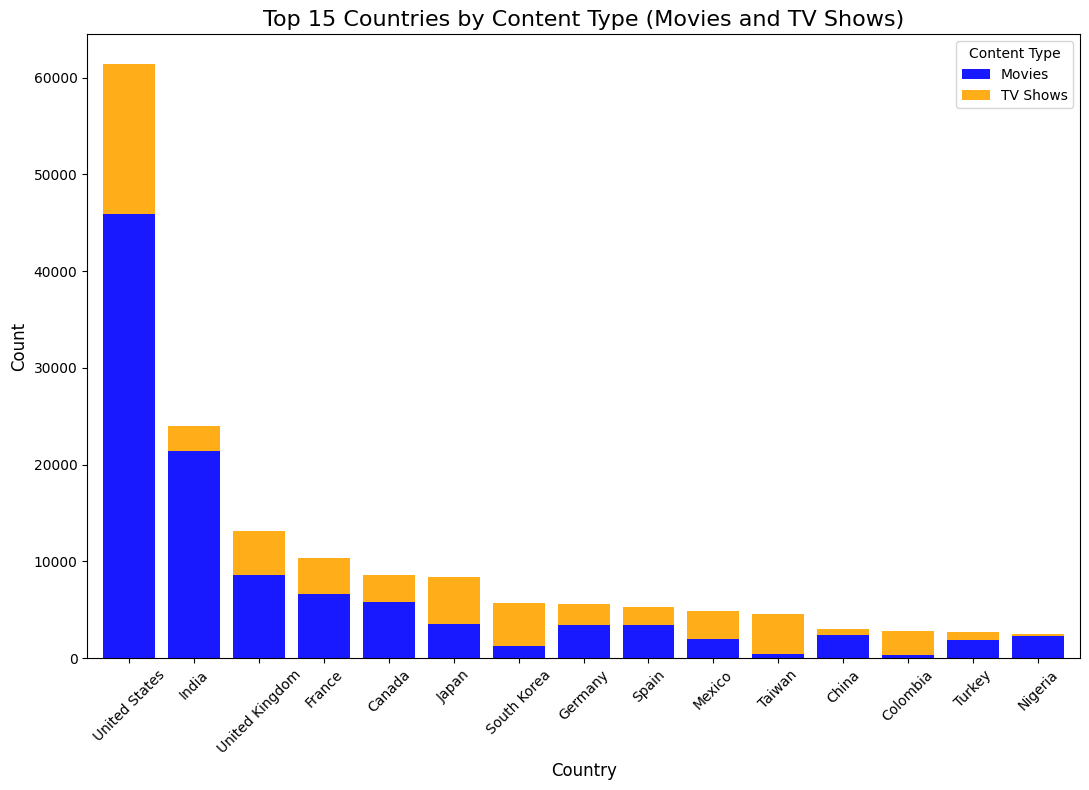

In [ ]:
# Extract top 15 countries
top_15_countries = pivot_table.head(15)

# Plot stacked bar chart
plt.figure(figsize=(15, 8))
top_15_countries[['Movies', 'TV Shows']].plot(kind='bar', stacked=True, figsize=(11, 8), color=['blue', 'orange'],
    width=0.8, alpha=0.9)

plt.title('Top 15 Countries by Content Type (Movies and TV Shows)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Content Type')

plt.tight_layout()
plt.show()

**Inference:-**

Above result shows the count of movies and TV shows over every country
where US leads the way with 45875 movies and 15541 Tv shows and India with 21411 movies and 2577 tv shows.

---



---



In [ ]:
## Movies vs TV shows in recent years added to Netflix

yearly_data = df.groupby(['year_added', 'type'])['show_id'].nunique().reset_index()

# Pivot the data for visualization
pivot_yearly_data = yearly_data.pivot(index='year_added', columns='type', values='show_id').fillna(0).astype(int)

pivot_yearly_data.drop(0, axis = 0, inplace = True)

<Figure size 1200x600 with 0 Axes>

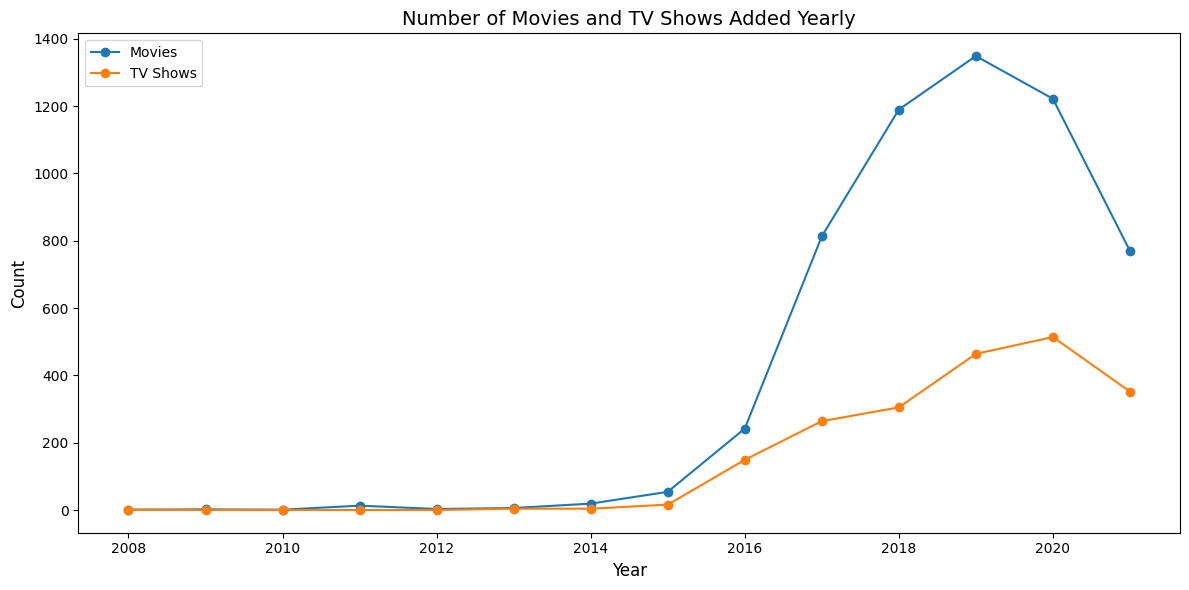

In [ ]:
# Plot the trends
plt.figure(figsize=(12,6))
pivot_yearly_data[['Movie', 'TV Show']].plot(figsize=(12,6), marker='o')
plt.title('Number of Movies and TV Shows Added Yearly', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['Movies', 'TV Shows'], loc='upper left')

plt.tight_layout()
plt.show()

**Inferences:-**

The above graph shows the number of movies and TV shows added to Netflix year on year where we can see that in the recent years there are more number of content are being added and Netflix has a good proportation of both the types.

---



---



# Year and Month wise analysis

In [ ]:
## Number of movies/TV shows released every year

movies_pr_yr = df.groupby('release_year')['title'].nunique().reset_index()
movies_pr_yr = movies_pr_yr.rename(columns={'release_year': 'Year', 'title': 'Movies/TV Shows Count'})
movies_pr_yr.drop(0, axis=0, inplace = True)
movies_pr_yr.sort_values(by = 'Movies/TV Shows Count',ascending = False)

,Year,Movies/TV Shows Count
69,2018,1019
68,2017,948
70,2019,896
71,2020,832
67,2016,826
...,...,...
21,1970,2
12,1961,1
10,1959,1
17,1966,1


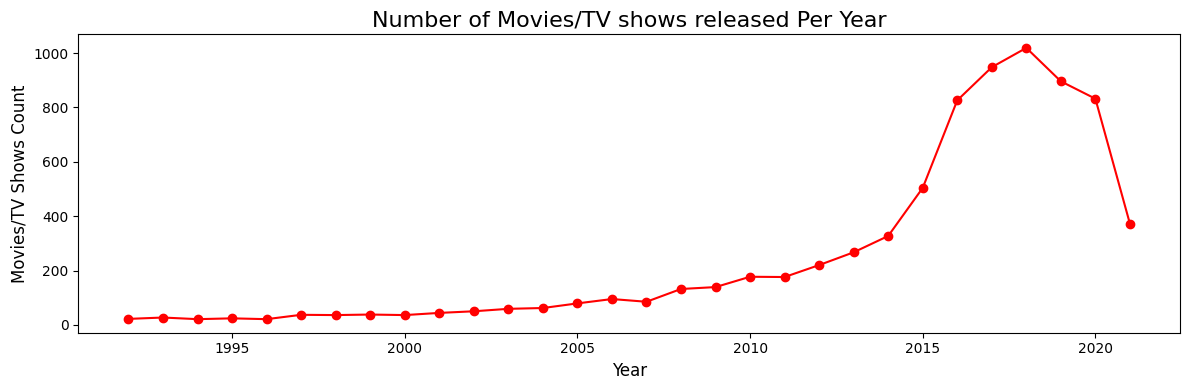

In [ ]:
## Lineplot

movies_pr_yr_30 = movies_pr_yr.sort_values(by='Year', ascending = False).head(30)
plt.figure(figsize=(12, 4))
plt.plot(movies_pr_yr_30['Year'], movies_pr_yr_30['Movies/TV Shows Count'], marker = 'o', color='r', label='Movies/TV Shows Count')

plt.title('Number of Movies/TV shows released every Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Movies/TV Shows Count', fontsize=12)
plt.tight_layout()
plt.show()

**Inferences:-**

This plot shows the number of movies and Tv shows released every year.

We can see that in the recent years there is a spike in the amount of movies released.

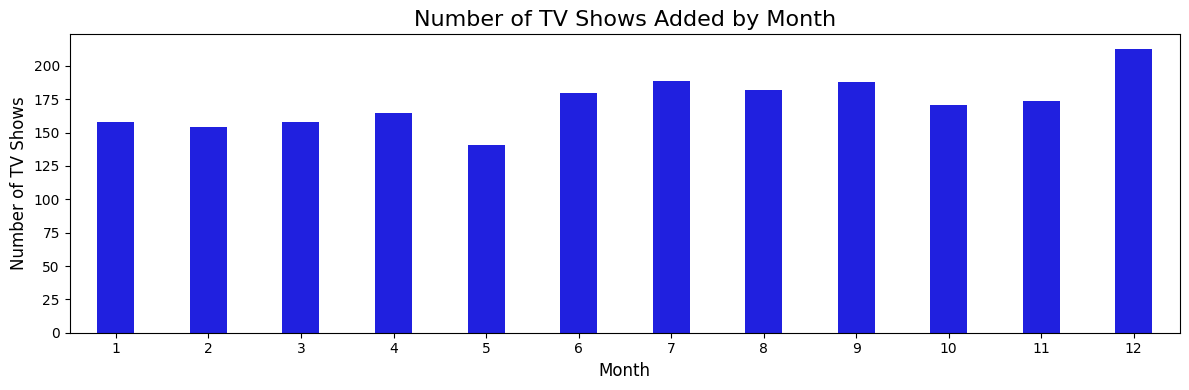

In [ ]:
## Number of TV shows added every month on Netflix

tv_shows = df[df['type'] == 'TV Show']
tv_shows_per_month = tv_shows.groupby('month_added')['title'].nunique().reset_index()
tv_shows_per_month = tv_shows_per_month.sort_values(by='month_added')
tv_shows_per_month.drop(0, inplace = True)

# Visualization
plt.figure(figsize=(12, 4))
sns.barplot(x='month_added', y='title', data=tv_shows_per_month, color = 'blue', width = 0.4)
plt.title('Number of TV Shows Added by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of TV Shows', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


**Inferences:-**

Here we can infer that in December month highest number of TV shows has been added to the Netflix.

This also shows that December month is the best time to release a TV show.

---



---



# Genre wise analysis:

In [ ]:
## Top 10 most popular genre on Netflix

popular_genre = df.groupby('listed_in')['title'].nunique().reset_index(name='Count')
popular_genre.sort_values(by = 'Count', ascending = False).head(10)

,listed_in,Count
16,International Movies,2543
12,Dramas,2317
7,Comedies,1580
17,International TV Shows,1032
0,Action & Adventure,817
10,Documentaries,793
15,Independent Movies,745
24,Romantic Movies,588
34,TV Dramas,576
41,Thrillers,549


**Inference:-**

This data shows the top 10 most popular genres with their count of movies/tv shows where International Movies tops the charts followed by Dramas and comedies.

---



---



In [ ]:
# Total genres in each country (Diversity of content in each country)

content_by_country = df.groupby(['country'])['listed_in'].nunique().reset_index(name='Count')

content_by_country = content_by_country.sort_values(by='Count', ascending=False)

content_by_country


,country,Count
106,United States,40
104,United Kingdom,31
18,Canada,29
49,Japan,29
94,Spain,28
...,...,...
28,Ecuador,1
90,Somalia,1
11,Bermuda,1
8,Bahamas,1


**Inferences:-**

The above data shows that countries with most diverse content present.
This shows that the top 3 countries with highest genre count are US, UK and Canada with 40, 31 and 29 respectively.

---



---



In [ ]:
## Most popular genre in each country

genre_country = df.groupby(['country', 'listed_in'])['title'].nunique().reset_index()

most_popular_genre_per_country = genre_country.loc[genre_country.groupby('country')['title'].idxmax()].reset_index(drop=True)

most_popular_genre_per_country.rename(columns={'country': 'Country',
                                               'listed_in': 'Most Popular Genre',
                                               'title': 'Number of Titles'},
                                       inplace=True)

most_popular_genre_per_country.sort_values(by='Number of Titles', ascending = False)


,Country,Most Popular Genre,Number of Titles
41,India,International Movies,864
106,United States,Dramas,835
104,United Kingdom,British TV Shows,225
32,France,International Movies,207
92,South Korea,International TV Shows,152
...,...,...,...
65,Mozambique,Dramas,1
70,Nicaragua,Documentaries,1
74,Panama,Documentaries,1
75,Paraguay,Action & Adventure,1


**Inferences:-**

The above result shows the most popular genre in each country, this data could allow Netflix to have a idea which genre movie/tv show are more likely to success in different countries.

---



---



In [ ]:
## Most popular Actor and director for each genre(listed_in).

# Most popular actor for each genre
actor_genre = df.groupby(['listed_in', 'cast'])['title'].nunique().reset_index()
actor_genre = actor_genre.sort_values(by=['listed_in', 'title'], ascending=[True, False])

popular_actor_per_genre = actor_genre.groupby('listed_in').first().reset_index()
popular_actor_per_genre.rename(columns={'cast': 'Most Popular Actor', 'title': 'Titles by Actor'}, inplace=True)

# Most popular director for each genre
director_genre = df.groupby(['listed_in', 'director'])['title'].nunique().reset_index()
director_genre = director_genre.sort_values(by=['listed_in', 'title'], ascending=[True, False])

popular_director_per_genre = director_genre.groupby('listed_in').first().reset_index()
popular_director_per_genre.rename(columns={'director': 'Most Popular Director', 'title': 'Titles by Director'}, inplace=True)

# Merged the two results into a single DataFrame
popular_actor_director_per_genre = pd.merge(popular_actor_per_genre,
                                            popular_director_per_genre,
                                            on='listed_in')

popular_actor_director_per_genre


,listed_in,Most Popular Actor,Titles by Actor,Most Popular Director,Titles by Director
0,Action & Adventure,Bruce Willis,13,Don Michael Paul,12
1,Anime Features,Yuki Kaji,11,Toshiya Shinohara,7
2,Anime Series,Takahiro Sakurai,21,Yasuhiro Irie,136
3,British TV Shows,John Cleese,35,Noam Murro,209
4,Children & Family Movies,Laura Bailey,14,Robert Rodriguez,21
5,Classic & Cult TV,Don S. Davis,2,Phil Sgriccia,18
6,Classic Movies,James Franco,7,Youssef Chahine,8
7,Comedies,Anupam Kher,20,Steve Brill,18
8,Crime TV Shows,James Franco,40,Danny Cannon,124
9,Cult Movies,Barrie Dunn,3,Mike Clattenburg,3


**Inference:-**

The above data allows us to have a look at the most popular Actor and Director in each genre.

---



---



# **Recommendations:**



1.   December and July month shows the higher content additions. These trends can be used for scheduling high-profile releases during these months to maximize viewership.
2.   Many countries shows diversity in content type. Netflix should produce or acquire more content in these genres to strengthen engagement.
3.   Promote projects involving popular actor-director pairs as these are likely to draw audiences.
4.   Data shows which actors, directors, or genres are most successful in each nation. Make an investment in content that supports these demonstrated achievements.
5.   Consider regional calendar events/Festivals/Holidays for targeted releases.
6.   Highlight popular genres or actor-director collaborations through featured sections on the platform.
